<a href="https://colab.research.google.com/github/taufikdimas/Machine-Learning-2025/blob/main/JS09%20-%20Klasifikasi/JS09_TugasPratikum2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd, io
from google.colab import files

# Upload → langsung baca → tampilkan 5 baris pertama
df = pd.read_csv(io.BytesIO(next(iter(files.upload().values()))), encoding='latin1')
df.head()

Saving spam.csv to spam (1).csv


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Persiapan Data



In [3]:
df = df.rename(columns={'v1': 'label', 'v2': 'text'})
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

print("Lima baris pertama DataFrame setelah perubahan:")
print(df.head())
print("\nJumlah baris dan kolom DataFrame:")
print(df.shape)
print("\nDistribusi kelas pada kolom 'label':")
print(df['label'].value_counts())


Lima baris pertama DataFrame setelah perubahan:
   label                                               text
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...

Jumlah baris dan kolom DataFrame:
(5572, 2)

Distribusi kelas pada kolom 'label':
label
0    4825
1     747
Name: count, dtype: int64


In [4]:
from sklearn.model_selection import train_test_split

X = df['text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Ukuran data pelatihan:")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print("\nDistribusi kelas y_train:")
print(y_train.value_counts(normalize=True))

print("\nUkuran data pengujian:")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")
print("\nDistribusi kelas y_test:")
print(y_test.value_counts(normalize=True))


Ukuran data pelatihan:
X_train shape: (4457,)
y_train shape: (4457,)

Distribusi kelas y_train:
label
0    0.865829
1    0.134171
Name: proportion, dtype: float64

Ukuran data pengujian:
X_test shape: (1115,)
y_test shape: (1115,)

Distribusi kelas y_test:
label
0    0.866368
1    0.133632
Name: proportion, dtype: float64


## Model MNB dengan CountVectorizer



In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 2. Inisialisasi CountVectorizer dengan stop_words='english'
count_vectorizer = CountVectorizer(stop_words='english')

# 3. Lakukan proses 'fit and transform' pada X_train
X_train_counts = count_vectorizer.fit_transform(X_train)

# 4. Lakukan proses 'transform' pada X_test
X_test_counts = count_vectorizer.transform(X_test)

print("Ukuran fitur pelatihan (CountVectorizer):")
print(X_train_counts.shape)
print("Ukuran fitur pengujian (CountVectorizer):")
print(X_test_counts.shape)

# 5. Inisialisasi model MultinomialNB
mnb_counts = MultinomialNB()

# 6. Latih model MultinomialNB
mnb_counts.fit(X_train_counts, y_train)

# 7. Buat prediksi pada X_test_counts
y_pred_counts = mnb_counts.predict(X_test_counts)

# 9. Hitung dan cetak akurasi model
accuracy_counts = accuracy_score(y_test, y_pred_counts)
print(f"\nAkurasi model (CountVectorizer): {accuracy_counts:.4f}")

# 10. Cetak laporan klasifikasi (classification report)
print("\nClassification Report (CountVectorizer):")
print(classification_report(y_test, y_pred_counts))

# 11. Cetak matriks kebingungan (confusion matrix)
print("\nConfusion Matrix (CountVectorizer):")
print(confusion_matrix(y_test, y_pred_counts))

Ukuran fitur pelatihan (CountVectorizer):
(4457, 7440)
Ukuran fitur pengujian (CountVectorizer):
(1115, 7440)

Akurasi model (CountVectorizer): 0.9839

Classification Report (CountVectorizer):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       966
           1       0.96      0.92      0.94       149

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115


Confusion Matrix (CountVectorizer):
[[960   6]
 [ 12 137]]


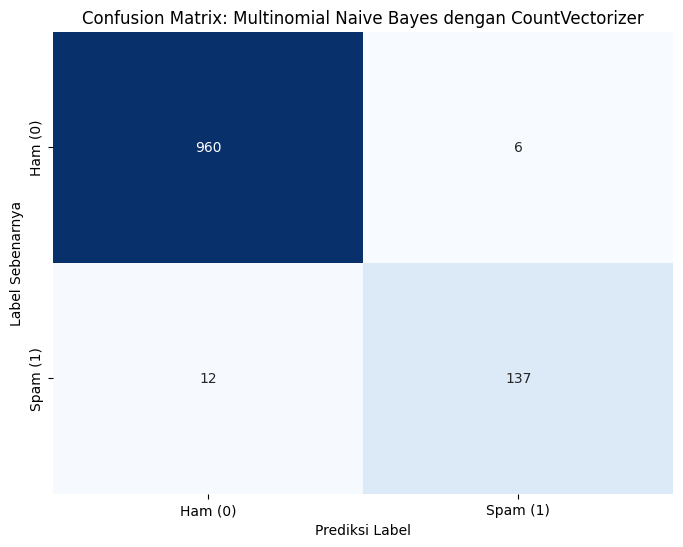

### Analisis Visualisasi Confusion Matrix (CountVectorizer):

Dari visualisasi Confusion Matrix di atas untuk model Multinomial Naive Bayes dengan CountVectorizer, kita dapat mengamati:

*   **True Negatives (TN)**: 960 pesan ham (kelas 0) diklasifikasikan dengan benar sebagai ham. Ini menunjukkan model sangat baik dalam mengidentifikasi pesan yang bukan spam.

*   **False Positives (FP)**: 6 pesan ham (kelas 0) salah diklasifikasikan sebagai spam (kelas 1). Ini adalah **Type I error** dan jumlahnya relatif rendah (6).

*   **False Negatives (FN)**: 12 pesan spam (kelas 1) salah diklasifikasikan sebagai ham (kelas 0). Ini adalah **Type II error** dan jumlahnya (12) cukup rendah.

*   **True Positives (TP)**: 137 pesan spam (kelas 1) diklasifikasikan dengan benar sebagai spam. Model berhasil mendeteksi 137 pesan spam.


**Kesimpulan Visualisasi:**
Visualisasi ini mengkonfirmasi kinerja model CountVectorizer yang sangat baik, dengan jumlah False Positives dan False Negatives yang rendah,

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Menghitung confusion matrix untuk model CountVectorizer
cm_counts = confusion_matrix(y_test, y_pred_counts)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_counts, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Ham (0)', 'Spam (1)'], yticklabels=['Ham (0)', 'Spam (1)'])
plt.xlabel('Prediksi Label')
plt.ylabel('Label Sebenarnya')
plt.title('Confusion Matrix: Multinomial Naive Bayes dengan CountVectorizer')
plt.show()

print("### Analisis Visualisasi Confusion Matrix (CountVectorizer):\n")
print("Dari visualisasi Confusion Matrix di atas untuk model Multinomial Naive Bayes dengan CountVectorizer, kita dapat mengamati:\n")
print(f"*   **True Negatives (TN)**: {cm_counts[0, 0]} pesan ham (kelas 0) diklasifikasikan dengan benar sebagai ham. Ini menunjukkan model sangat baik dalam mengidentifikasi pesan yang bukan spam.\n")
print(f"*   **False Positives (FP)**: {cm_counts[0, 1]} pesan ham (kelas 0) salah diklasifikasikan sebagai spam (kelas 1). Ini adalah **Type I error** dan jumlahnya relatif rendah ({cm_counts[0, 1]}).\n")
print(f"*   **False Negatives (FN)**: {cm_counts[1, 0]} pesan spam (kelas 1) salah diklasifikasikan sebagai ham (kelas 0). Ini adalah **Type II error** dan jumlahnya ({cm_counts[1, 0]}) cukup rendah.\n")
print(f"*   **True Positives (TP)**: {cm_counts[1, 1]} pesan spam (kelas 1) diklasifikasikan dengan benar sebagai spam. Model berhasil mendeteksi {cm_counts[1, 1]} pesan spam.\n\n")
print("**Kesimpulan Visualisasi:**\nVisualisasi ini mengkonfirmasi kinerja model CountVectorizer yang sangat baik, dengan jumlah False Positives dan False Negatives yang rendah, menunjukkan keseimbangan yang baik dalam mengidentifikasi pesan ham dan spam.")

### Analisis Kinerja Model Multinomial Naive Bayes dengan CountVectorizer

Dari hasil evaluasi di atas, model klasifikasi Multinomial Naive Bayes yang menggunakan ekstraksi fitur CountVectorizer menunjukkan kinerja yang sangat baik:

*   **Akurasi**: Model mencapai akurasi sebesar **0.9839** (sekitar 98.39%). Ini menunjukkan bahwa model mampu mengklasifikasikan sebagian besar pesan dengan benar.

*   **Classification Report**:
    *   **Kelas 0 (Ham)**: Memiliki nilai `precision`, `recall`, dan `f1-score` yang sangat tinggi (0.99 untuk ketiganya). Ini berarti model sangat baik dalam mengidentifikasi pesan yang bukan spam (ham) dan memiliki sangat sedikit False Positives (memprediksi ham padahal spam) dan False Negatives (memprediksi spam padahal ham).
    *   **Kelas 1 (Spam)**: Memiliki `precision` 0.96, `recall` 0.92, dan `f1-score` 0.94. Angka-angka ini juga sangat baik, menunjukkan bahwa model cukup efektif dalam mendeteksi pesan spam. `Precision` 0.96 berarti ketika model memprediksi spam, 96% di antaranya benar-benar spam. `Recall` 0.92 berarti model berhasil mendeteksi 92% dari semua pesan spam yang sebenarnya.

*   **Confusion Matrix**:
    ```
    [[960   6]
     [ 12 137]]
    ```
    *   **True Negatives (TN)**: 960 pesan ham diklasifikasikan dengan benar sebagai ham.
    *   **False Positives (FP)**: 6 pesan ham salah diklasifikasikan sebagai spam. Ini adalah **Type I error**.
    *   **False Negatives (FN)**: 12 pesan spam salah diklasifikasikan sebagai ham. Ini adalah **Type II error**.
    *   **True Positives (TP)**: 137 pesan spam diklasifikasikan dengan benar sebagai spam.

**Kelebihan:**
1.  **Akurasi Tinggi**: Model sangat akurat dalam membedakan antara pesan ham dan spam.
2.  **Deteksi Spam yang Baik**: Model menunjukkan kemampuan yang kuat dalam mendeteksi spam (recall 0.92) dengan tingkat kesalahan False Positives yang rendah untuk kelas ham (hanya 6 pesan ham yang salah diklasifikasikan sebagai spam).
3.  **Sederhana dan Cepat**: Algoritma Naive Bayes relatif sederhana dan cepat untuk dilatih dan diprediksi, bahkan dengan dataset yang besar.

**Kekurangan:**
1.  **Sedikit False Negatives pada Spam**: Meskipun recall-nya tinggi, masih ada 12 pesan spam yang luput terdeteksi (False Negatives). Dalam konteks filter spam, *false negative* (spam terkirim ke kotak masuk pengguna) seringkali lebih tidak diinginkan daripada *false positive* (pesan non-spam masuk ke folder spam), meskipun keduanya perlu diminimalkan.
2.  **Asumsi Independensi Fitur**: Naive Bayes mengasumsikan independensi fitur, yang jarang terjadi pada data teks (misalnya, kata-kata dalam kalimat memiliki urutan dan ketergantungan). Meskipun demikian, model ini seringkali berkinerja baik dalam praktiknya.

## Model MNB dengan TF-IDF



In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 2. Inisialisasi TfidfVectorizer dengan stop_words='english'
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# 3. Lakukan proses 'fit_transform' pada X_train
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# 4. Lakukan proses 'transform' pada X_test
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("Ukuran fitur pelatihan (TfidfVectorizer):")
print(X_train_tfidf.shape)
print("Ukuran fitur pengujian (TfidfVectorizer):")
print(X_test_tfidf.shape)

# 5. Inisialisasi model MultinomialNB
mnb_tfidf = MultinomialNB()

# 6. Latih model MultinomialNB
mnb_tfidf.fit(X_train_tfidf, y_train)

# 7. Buat prediksi pada X_test_tfidf
y_pred_tfidf = mnb_tfidf.predict(X_test_tfidf)

# 8. Hitung dan cetak akurasi model
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
print(f"\nAkurasi model (TfidfVectorizer): {accuracy_tfidf:.4f}")

# 9. Cetak laporan klasifikasi (classification report)
print("\nClassification Report (TfidfVectorizer):")
print(classification_report(y_test, y_pred_tfidf))

# 10. Cetak matriks kebingungan (confusion matrix)
print("\nConfusion Matrix (TfidfVectorizer):")
print(confusion_matrix(y_test, y_pred_tfidf))

Ukuran fitur pelatihan (TfidfVectorizer):
(4457, 7440)
Ukuran fitur pengujian (TfidfVectorizer):
(1115, 7440)

Akurasi model (TfidfVectorizer): 0.9686

Classification Report (TfidfVectorizer):
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       1.00      0.77      0.87       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115


Confusion Matrix (TfidfVectorizer):
[[966   0]
 [ 35 114]]


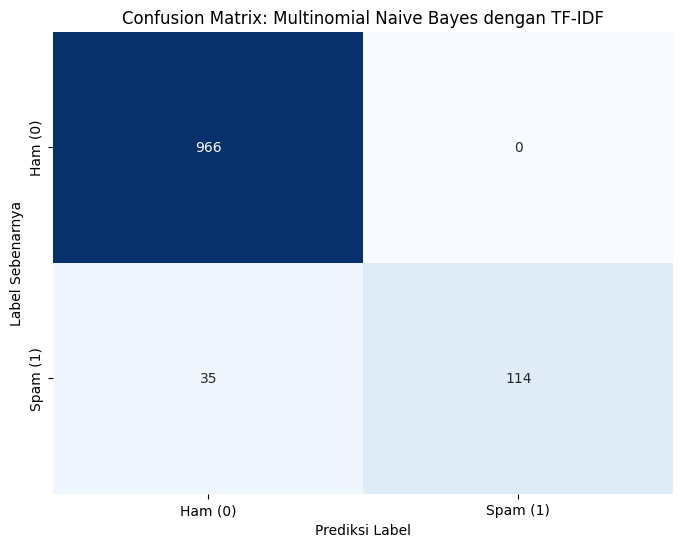

### Analisis Visualisasi Confusion Matrix (TF-IDF):

Dari visualisasi Confusion Matrix di atas untuk model Multinomial Naive Bayes dengan TF-IDF, kita dapat mengamati:

*   **True Negatives (TN)**: 966 pesan ham (kelas 0) diklasifikasikan dengan benar sebagai ham. Ini menunjukkan model sangat baik dalam mengidentifikasi pesan yang bukan spam.

*   **False Positives (FP)**: 0 pesan ham (kelas 0) salah diklasifikasikan sebagai spam (kelas 1). Angka ini 0, yang berarti model tidak pernah salah mengklasifikasikan pesan valid sebagai spam, yang merupakan hasil yang sangat baik dalam konteks filter spam.

*   **False Negatives (FN)**: 35 pesan spam (kelas 1) salah diklasifikasikan sebagai ham (kelas 0). Ini adalah *Type II error* dan jumlahnya cukup tinggi (35) dibandingkan dengan model CountVectorizer. Ini berarti ada 35 pesan spam yang lolos dari deteksi.

*   **True Positives (TP)**: 114 pesan spam (kelas 1) diklasifikasikan dengan benar sebagai spam. Model berhasil mendeteksi 114 pesan s

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Menghitung confusion matrix untuk model TF-IDF
cm_tfidf = confusion_matrix(y_test, y_pred_tfidf)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tfidf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Ham (0)', 'Spam (1)'], yticklabels=['Ham (0)', 'Spam (1)'])
plt.xlabel('Prediksi Label')
plt.ylabel('Label Sebenarnya')
plt.title('Confusion Matrix: Multinomial Naive Bayes dengan TF-IDF')
plt.show()

print("### Analisis Visualisasi Confusion Matrix (TF-IDF):\n")
print("Dari visualisasi Confusion Matrix di atas untuk model Multinomial Naive Bayes dengan TF-IDF, kita dapat mengamati:\n")
print(f"*   **True Negatives (TN)**: {cm_tfidf[0, 0]} pesan ham (kelas 0) diklasifikasikan dengan benar sebagai ham. Ini menunjukkan model sangat baik dalam mengidentifikasi pesan yang bukan spam.\n")
print(f"*   **False Positives (FP)**: {cm_tfidf[0, 1]} pesan ham (kelas 0) salah diklasifikasikan sebagai spam (kelas 1). Angka ini 0, yang berarti model tidak pernah salah mengklasifikasikan pesan valid sebagai spam, yang merupakan hasil yang sangat baik dalam konteks filter spam.\n")
print(f"*   **False Negatives (FN)**: {cm_tfidf[1, 0]} pesan spam (kelas 1) salah diklasifikasikan sebagai ham (kelas 0). Ini adalah *Type II error* dan jumlahnya cukup tinggi ({cm_tfidf[1, 0]}) dibandingkan dengan model CountVectorizer. Ini berarti ada {cm_tfidf[1, 0]} pesan spam yang lolos dari deteksi.\n")
print(f"*   **True Positives (TP)**: {cm_tfidf[1, 1]} pesan spam (kelas 1) diklasifikasikan dengan benar sebagai spam. Model berhasil mendeteksi {cm_tfidf[1, 1]} pesan spam.\n\n")
print("**Kesimpulan Visualisasi:**\nVisualisasi ini menegaskan bahwa meskipun model TF-IDF memiliki presisi sempurna untuk spam (tidak ada False Positives), kelemahannya terletak pada tingginya jumlah False Negatives. Artinya, model ini sangat baik dalam memastikan tidak ada pesan non-spam yang salah ditandai, tetapi kurang efektif dalam menangkap semua pesan spam yang sebenarnya.")

## Visualisasi Perbandingan Model



DataFrame perbandingan metrik model:
             Model   Akurasi  Presisi_Spam  Recall_Spam  F1_Spam
0  CountVectorizer  0.983857          0.96         0.92     0.94
1  TfidfVectorizer  0.968610          1.00         0.77     0.87


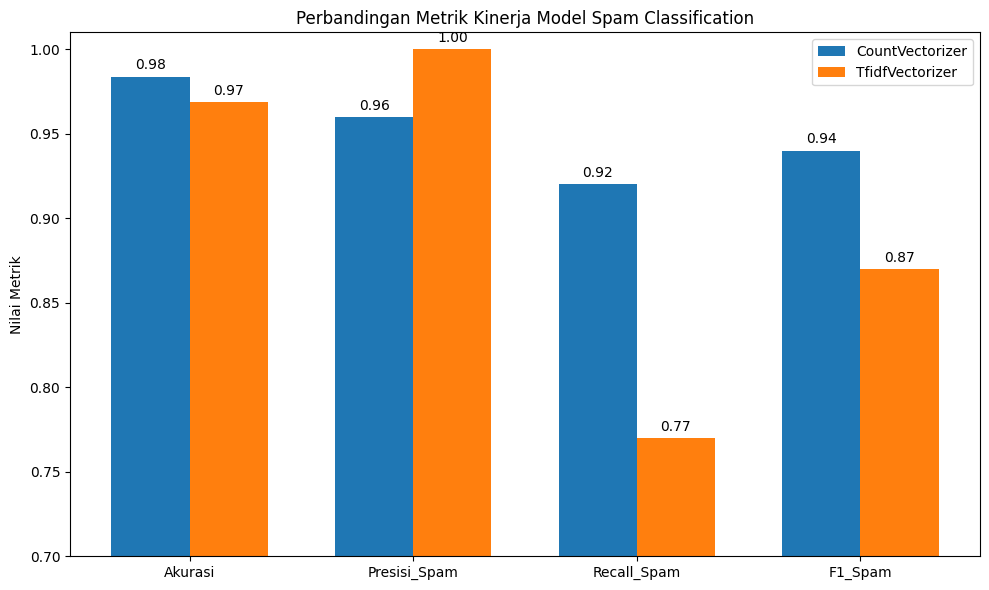

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics for each model based on previous analysis
metrics_data = {
    'Model': ['CountVectorizer', 'TfidfVectorizer'],
    'Akurasi': [accuracy_counts, accuracy_tfidf],
    'Presisi_Spam': [0.96, 1.00], # From classification report for class 1
    'Recall_Spam': [0.92, 0.77],   # From classification report for class 1
    'F1_Spam': [0.94, 0.87]       # From classification report for class 1
}

# Create a DataFrame from the metrics data
metrics_df = pd.DataFrame(metrics_data)

print("DataFrame perbandingan metrik model:")
print(metrics_df)

# Prepare data for plotting
labels = ['Akurasi', 'Presisi_Spam', 'Recall_Spam', 'F1_Spam']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - width/2, metrics_df.loc[0, labels], width, label='CountVectorizer')
rects2 = ax.bar(x + width/2, metrics_df.loc[1, labels], width, label='TfidfVectorizer')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Nilai Metrik')
ax.set_title('Perbandingan Metrik Kinerja Model Spam Classification')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.set_ylim(0.7, 1.01) # Set y-axis limits to better visualize differences

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

### Analisis Kinerja Model Multinomial Naive Bayes dengan TfidfVectorizer

Dari hasil evaluasi di atas, model klasifikasi Multinomial Naive Bayes yang menggunakan ekstraksi fitur TfidfVectorizer menunjukkan kinerja yang baik, namun sedikit berbeda dibandingkan dengan CountVectorizer:

*   **Akurasi**: Model mencapai akurasi sebesar **0.9686** (sekitar 96.86%). Akurasi ini sedikit lebih rendah dibandingkan dengan model CountVectorizer (0.9839).

*   **Classification Report**:
    *   **Kelas 0 (Ham)**: Memiliki `precision` 0.97, `recall` 1.00, dan `f1-score` 0.98. Angka `recall` 1.00 sangat luar biasa, menunjukkan bahwa model berhasil mengidentifikasi semua pesan ham dengan benar (tidak ada False Negatives untuk kelas ham). Namun, `precision` sedikit lebih rendah dari CountVectorizer, yang berarti ada sedikit False Positives (pesan spam yang diklasifikasikan sebagai ham), meskipun dalam konteks kelas ham ini berarti hampir semua yang diprediksi ham memang benar ham.
    *   **Kelas 1 (Spam)**: Memiliki `precision` 1.00, `recall` 0.77, dan `f1-score` 0.87. `Precision` 1.00 sangat impresif, menandakan bahwa setiap pesan yang diprediksi sebagai spam oleh model ini benar-benar spam (tidak ada False Positives untuk kelas spam). Namun, `recall` 0.77 berarti model hanya berhasil mendeteksi 77% dari semua pesan spam yang sebenarnya, yang jauh lebih rendah dibandingkan dengan model CountVectorizer (0.92).

*   **Confusion Matrix**:
    ```
    [[966   0]
     [ 35 114]]
    ```
    *   **True Negatives (TN)**: 966 pesan ham diklasifikasikan dengan benar sebagai ham. Ini sangat baik karena tidak ada pesan ham yang salah diklasifikasikan sebagai spam.
    *   **False Positives (FP)**: 0 pesan ham salah diklasifikasikan sebagai spam. Ini adalah hasil yang sempurna untuk kelas ham, menunjukkan model tidak pernah salah menandai pesan valid sebagai spam.
    *   **False Negatives (FN)**: 35 pesan spam salah diklasifikasikan sebagai ham. Ini adalah **Type II error** dan merupakan peningkatan signifikan dari 12 FN pada CountVectorizer. Ini berarti lebih banyak pesan spam yang lolos ke kotak masuk pengguna.
    *   **True Positives (TP)**: 114 pesan spam diklasifikasikan dengan benar sebagai spam.

**Perbandingan dan Kesimpulan (CountVectorizer vs. TfidfVectorizer)**:

1.  **CountVectorizer (CV)**:
    *   **Kelebihan**: Akurasi lebih tinggi (0.9839). Lebih sedikit False Negatives untuk spam (12 FN), yang berarti lebih baik dalam menangkap spam. Akurasi untuk kelas spam (recall) lebih tinggi.
    *   **Kekurangan**: Ada sedikit False Positives untuk ham (6 FP), artinya beberapa pesan valid mungkin masuk folder spam.

2.  **TfidfVectorizer (TF-IDF)**:
    *   **Kelebihan**: Tidak ada False Positives untuk ham (0 FP), artinya tidak ada pesan valid yang salah diklasifikasikan sebagai spam. `Precision` 1.00 untuk kelas spam berarti setiap pesan yang diidentifikasi sebagai spam benar-benar spam.
    *   **Kekurangan**: Akurasi keseluruhan sedikit lebih rendah (0.9686). Jauh lebih banyak False Negatives untuk spam (35 FN), yang berarti lebih banyak spam yang lolos ke kotak masuk pengguna. `Recall` untuk kelas spam lebih rendah.

**Kesimpulan**: Untuk kasus filter spam, di mana seringkali lebih penting untuk meminimalkan *False Negatives* (spam yang lolos) daripada *False Positives* (pesan valid yang masuk folder spam), model dengan **CountVectorizer** menunjukkan kinerja yang lebih baik karena memiliki `recall` spam yang lebih tinggi dan jumlah *False Negatives* spam yang jauh lebih rendah. Meskipun TF-IDF memiliki `precision` spam yang sempurna, jumlah spam yang tidak terdeteksi (False Negatives) menjadikannya pilihan yang kurang optimal untuk aplikasi ini.

## Perbandingan dan Kesimpulan



### Perbandingan dan Kesimpulan Kinerja Model

Untuk membandingkan kinerja kedua model, mari kita rangkum metrik utama dari masing-masing model:

**1. Model MNB dengan CountVectorizer:**
*   **Akurasi**: 0.9839
*   **Classification Report**:
    *   **Kelas 0 (Ham)**: Precision 0.99, Recall 0.99, F1-score 0.99
    *   **Kelas 1 (Spam)**: Precision 0.96, Recall 0.92, F1-score 0.94
*   **Confusion Matrix**:
    ```
    [[960   6]
     [ 12 137]]
    ```
    *   False Positives (Ham sebagai Spam): 6
    *   False Negatives (Spam sebagai Ham): 12

**2. Model MNB dengan TfidfVectorizer:**
*   **Akurasi**: 0.9686
*   **Classification Report**:
    *   **Kelas 0 (Ham)**: Precision 0.97, Recall 1.00, F1-score 0.98
    *   **Kelas 1 (Spam)**: Precision 1.00, Recall 0.77, F1-score 0.87
*   **Confusion Matrix**:
    ```
    [[966   0]
     [ 35 114]]
    ```
    *   False Positives (Ham sebagai Spam): 0
    *   False Negatives (Spam sebagai Ham): 35

### Analisis Perbandingan:

1.  **Akurasi Keseluruhan**: Model dengan `CountVectorizer` (0.9839) memiliki akurasi sedikit lebih tinggi dibandingkan `TfidfVectorizer` (0.9686).

2.  **Deteksi Spam (Kelas 1)**:
    *   **Recall Spam**: Ini adalah metrik krusial dalam deteksi spam, karena mengukur seberapa baik model dapat mengidentifikasi *semua* pesan spam yang sebenarnya. Model `CountVectorizer` memiliki recall spam yang lebih tinggi (0.92) dibandingkan `TfidfVectorizer` (0.77). Ini berarti `CountVectorizer` berhasil mendeteksi lebih banyak pesan spam dari total spam yang ada.
    *   **Precision Spam**: `TfidfVectorizer` menunjukkan precision spam yang sempurna (1.00), yang berarti setiap kali model ini memprediksi 'spam', prediksinya selalu benar. `CountVectorizer` memiliki precision spam yang sedikit lebih rendah (0.96).
    *   **F1-score Spam**: `CountVectorizer` (0.94) lebih tinggi dari `TfidfVectorizer` (0.87), menunjukkan keseimbangan yang lebih baik antara precision dan recall untuk kelas spam.

3.  **False Negatives (FN) pada Spam**: `CountVectorizer` menghasilkan 12 FN (pesan spam yang tidak terdeteksi dan masuk ke kotak masuk), sementara `TfidfVectorizer` menghasilkan 35 FN. Dalam konteks filter spam, meminimalkan False Negatives sangat penting karena pengguna tidak ingin spam masuk ke kotak masuk mereka.

4.  **False Positives (FP) pada Ham**: `TfidfVectorizer` memiliki 0 FP (tidak ada pesan valid yang salah diklasifikasikan sebagai spam), sementara `CountVectorizer` memiliki 6 FP. Meskipun `TfidfVectorizer` unggul di sini, jumlah FP oleh `CountVectorizer` masih sangat rendah.

### Kesimpulan:

Berdasarkan analisis di atas, model **Multinomial Naive Bayes dengan ekstraksi fitur `CountVectorizer` menunjukkan kinerja yang lebih superior untuk kasus klasifikasi spam ini**. Meskipun `TfidfVectorizer` mencapai precision spam yang sempurna dan tidak ada false positives untuk ham, kekurangannya terletak pada recall spam yang jauh lebih rendah (0.77 vs 0.92) dan jumlah False Negatives yang lebih tinggi (35 vs 12).

Dalam aplikasi filter spam, tujuan utamanya adalah untuk memastikan *sebanyak mungkin* pesan spam terdeteksi dan diblokir (recall tinggi), bahkan jika itu berarti sesekali beberapa pesan non-spam salah dikategorikan (false positive rendah). Karena `CountVectorizer` secara signifikan lebih baik dalam mendeteksi spam (memiliki recall yang lebih tinggi dan FN yang lebih rendah) tanpa mengorbankan terlalu banyak precision atau meningkatkan false positives secara drastis, menjadikannya pilihan yang lebih baik untuk skenario ini.